# Stochastic Reduce Order Model Example 3
Author: Mohit S. Chauhan
Date: Oct 15, 2018

In this example, Uncertainty in eigenvalues of a system is studied using SROM and it is compared with the Monte Carlo Simulation results. Stiffness of each element (i.e. k1, k2 and k3) are treated as random variables which follows gamma distribution. SROM is created for all three random variables and distribution of eigenvalues are identified using SROM.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the MCS, STS and SROM class from UQpy.

In [1]:
from UQpy.SampleMethods import STS
from UQpy.SampleMethods import MCS
from UQpy.Surrogates import SROM
from UQpy.RunModel import RunModel
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

Using UQpy STS class to generate samples for three random variables having Gamma distribution with shape, shift and scale parameters as 2, 1 and 3.

In [2]:
np.random.seed(42)
x = STS(dimension=3, dist_name=['Gamma', 'Gamma', 'Gamma'], dist_params=[[2, 3, 1], [2, 3, 1], [2, 3, 1]],
        sts_design=[3, 3, 3])

UQpy: Successful execution of STS design..


Run SROM to minimize the error in distribution, first order and second order moment about origin. 

In [3]:
y = SROM(samples=x.samples, cdf_target=['Gamma', 'Gamma', 'Gamma'], moments=[[6, 6, 6], [54, 54, 54]],
         weights_errors=[1, 1, 0], properties=[True, True, True, False],
         cdf_target_params=[[2, 3, 1], [2, 3, 1], [2, 3, 1]])

UQpy: Performing SROM...
Done!


Plot the sample sets and weights from SROM class. Also, compared with the CDF of gamma distrbution of k1.

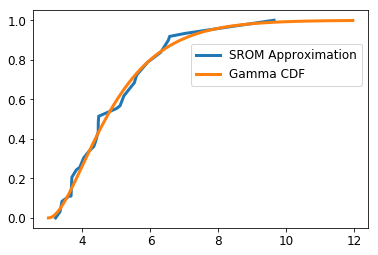

In [4]:
# Arrange samples in increasing order and sort samples accordingly
com = np.append(y.samples, np.transpose(np.matrix(y.sample_weights)), 1)
srt = com[np.argsort(com[:, 0].flatten())]
s = np.array(srt[0, :, 0])
a = srt[0, :, 3]
a0 = np.array(np.cumsum(a))
# Plot the SROM approximation and compare with actual gamma distribution
l = 3
fig = plt.figure()
plt.rcParams.update({'font.size': 12})
plt.plot(s[0], a0[0], linewidth=l)
plt.plot(np.arange(3, 12, 0.05), gamma.cdf(np.arange(3, 12, 0.05), a=2, loc=3, scale=1), linewidth=l)
plt.legend(['SROM Approximation', 'Gamma CDF'], loc=5, prop={'size': 12}, bbox_to_anchor=(1, 0.75))
plt.show()

Run the model 'eigenvalue_model.py' for each sample generated through STS class. This model defines the stiffness matrix corresponding to each sample and estimate the eigenvalues of the matrix.

In [5]:
r = RunModel(cpu=1, model_type='python', model_script='eigenvalue_model.py', dimension=3, samples=y.samples)


Evaluating the model...



MCS class is used to generate 1000 samples. 

In [6]:
x_mcs = MCS(dimension=3, dist_name=['Gamma', 'Gamma', 'Gamma'], dist_params=[[2, 3, 1], [2, 3, 1], [2, 3, 1]],
            nsamples=1000)

UQpy: Successful execution of MCS design..


Run the model 'eigenvalue_model.py' for each sample generated through MCS class

In [7]:
r_mcs = RunModel(cpu=1, model_type='python', model_script='eigenvalue_model.py', dimension=3, samples=x_mcs.samples)


Evaluating the model...



Plot the distribution of each eigenvalue, estimated using SROM and MCS weights. 

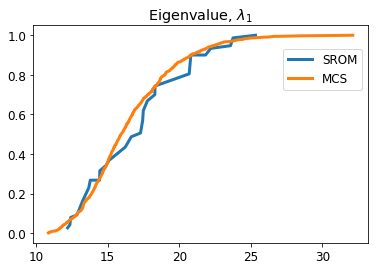

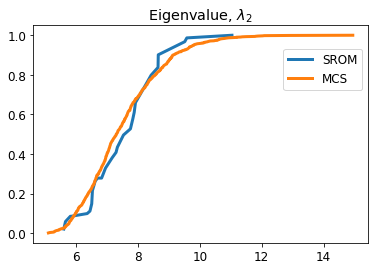

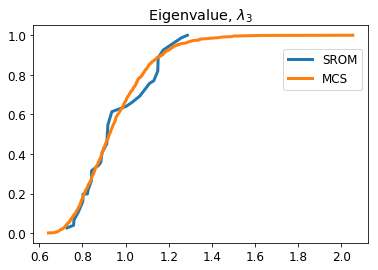

In [8]:
# Plot SROM and MCS approximation for first eigenvalue
com = np.append(r.model_eval.QOI, np.transpose(np.matrix(y.sample_weights)), 1)
srt = com[np.argsort(com[:, 0].flatten())]
s = np.array(srt[0, :, 0])
a = srt[0, :, 3]
a0 = np.array(np.cumsum(a))
fig1 = plt.figure()
plt.plot(s[0], a0[0], linewidth=l)
r_mcs0 = r_mcs.model_eval.QOI[np.argsort(r_mcs.model_eval.QOI[:, 0].flatten())]
plt.plot(r_mcs0[:, 0], np.cumsum(0.001*np.ones([1, 1000])), linewidth=l)
plt.title('Eigenvalue, $\lambda_1$')
plt.legend(['SROM', 'MCS'], loc=1, prop={'size': 12}, bbox_to_anchor=(1, 0.92))
plt.show()

# Plot SROM and MCS approximation for second eigenvalue
com = np.append(r.model_eval.QOI, np.transpose(np.matrix(y.sample_weights)), 1)
srt = com[np.argsort(com[:, 1].flatten())]
s = np.array(srt[0, :, 1])
a = srt[0, :, 3]
a0 = np.array(np.cumsum(a))
fig2 = plt.figure()
plt.plot(s[0], a0[0], linewidth=l)
r_mcs0 = r_mcs.model_eval.QOI[np.argsort(r_mcs.model_eval.QOI[:, 1].flatten())]
plt.plot(r_mcs0[:, 1], np.cumsum(0.001*np.ones([1, 1000])), linewidth=l)
plt.title('Eigenvalue, $\lambda_2$')
plt.legend(['SROM', 'MCS'], loc=1, prop={'size': 12}, bbox_to_anchor=(1, 0.92))
plt.show()

# Plot SROM and MCS approximation for third eigenvalue
com = np.append(r.model_eval.QOI, np.transpose(np.matrix(y.sample_weights)), 1)
srt = com[np.argsort(com[:, 2].flatten())]
s = np.array(srt[0, :, 2])
a = srt[0, :, 3]
a0 = np.array(np.cumsum(a))
fig3 = plt.figure()
plt.plot(s[0], a0[0], linewidth=l)
r_mcs0 = r_mcs.model_eval.QOI[np.argsort(r_mcs.model_eval.QOI[:, 2].flatten())]
plt.plot(r_mcs0[:, 2], np.cumsum(0.001*np.ones([1, 1000])), linewidth=l)
plt.title('Eigenvalue, $\lambda_3$')
plt.legend(['SROM', 'MCS'], loc=1, prop={'size': 12}, bbox_to_anchor=(1, 0.92))
plt.show()

Note: Monte Carlo Simulation used 1000 samples, whereas SROM used 27 samples.